In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
price = pd.read_csv("../data/curated/prediction_house.csv")
price_apart = pd.read_csv("../data/curated/prediction_apartment.csv")

In [3]:
price.head()
price_apart.head()

,Unnamed: 0,suburb,price2022,price2023,price2024,price2025
0,0,EAST MELBOURNE,495,554.3626,553.3934,552.9421
1,1,EAST MELBOURNE,495,554.3626,553.3934,552.9421
2,2,EAST MELBOURNE,420,531.5913,538.4018,543.0511
3,3,EAST MELBOURNE,420,531.5913,538.4018,543.0511
4,4,EAST MELBOURNE,550,554.3626,553.3934,552.9421


House in Top10 growth rate suburbs


In [4]:
price = price.drop_duplicates(keep= 'first')

a= pd.DataFrame(price['price2022'].groupby(price['suburb']).mean().reset_index())
b = pd.DataFrame(price['price2023'].groupby(price['suburb']).mean().reset_index())


newprice = pd.merge(a,b, how='left')

newprice.head()

,suburb,price2022,price2023
0,ABBOTSFORD,644.0,648.538290
1,AIRPORT WEST,420.0,428.844600
2,ALFREDTON,480.0,472.238070
3,ALTONA,440.0,432.842680
4,ALTONA MEADOWS,630.0,611.753295


Formula


In [5]:
newprice['growth rate(%)'] = ((newprice['price2023']- (newprice['price2022'])) / newprice['price2022']) *100

In [6]:
newprice = newprice.sort_values(by="growth rate(%)" , ascending=False)

In [7]:

newprice.head(30)

,suburb,price2022,price2023,growth rate(%)
136,WERRIBEE - SOUTH,280.000000,544.153900,94.340679
127,TRUGANINA,441.428571,729.033004,65.153108
80,LALOR,500.000000,781.878100,56.375620
118,SUNSHINE NORTH,350.000000,541.305850,54.658814
32,CAULFIELD - NORTH,680.000000,1009.464050,48.450596
131,WALLAN,390.000000,541.305850,38.796372
133,WANTIRNA SOUTH,472.500000,593.825455,25.677345
109,RINGWOOD EAST,550.000000,689.321200,25.331127
123,THOMASTOWN,388.333333,481.405063,23.966969
10,BAYSWATER,520.000000,641.003850,23.269971


Remove outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x10686b250>,
 'caps': [<matplotlib.lines.Line2D at 0x10686b7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x106852f40>],
 'medians': [<matplotlib.lines.Line2D at 0x10686bd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1249770a0>],
 'means': []}

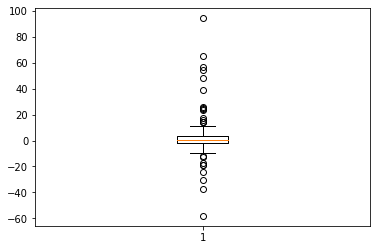

In [8]:
plt.boxplot(newprice['growth rate(%)'])


In [9]:
newprice = newprice[newprice['growth rate(%)']<=100]

{'whiskers': [<matplotlib.lines.Line2D at 0x124af7040>,
 'caps': [<matplotlib.lines.Line2D at 0x124af75e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x124ae7d30>],
 'medians': [<matplotlib.lines.Line2D at 0x124af7b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x124af7e50>],
 'means': []}

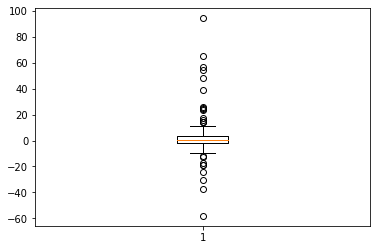

In [10]:
plt.boxplot(newprice['growth rate(%)'])

Bar plot show top 10 suburb

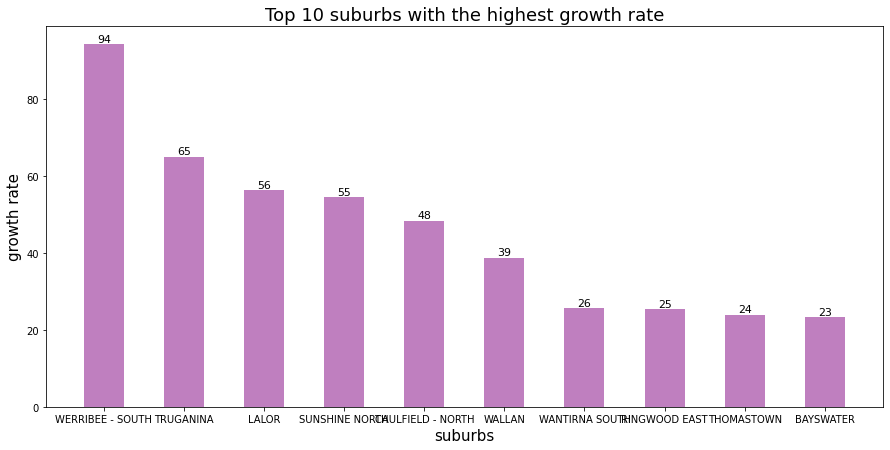

In [11]:
# plot the relationship between income growth rate and top10 suburb
df1 = newprice[['suburb','growth rate(%)']]
y = df1['growth rate(%)'][:10]
x = df1['suburb'][:10]

fig = plt.figure(figsize =(15, 7))
plt.bar(x, y, alpha=0.5, width = 0.5, linewidth = 2, color = 'purple')
plt.title('Top 10 suburbs with the highest growth rate', fontsize= 18)
for a,b in zip(x,y):
 plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.xlabel('suburbs', fontsize = 15)
plt.ylabel('growth rate', fontsize = 15)
plt.show()
#plt.savefig("../plots/house growth rate.png")

In [12]:
for i in df1['suburb'][:10]:
    print('Top10suburb is %s' % i)


Top10suburb is WERRIBEE - SOUTH
Top10suburb is TRUGANINA
Top10suburb is LALOR
Top10suburb is SUNSHINE NORTH
Top10suburb is CAULFIELD - NORTH
Top10suburb is WALLAN
Top10suburb is WANTIRNA SOUTH
Top10suburb is RINGWOOD EAST
Top10suburb is THOMASTOWN
Top10suburb is BAYSWATER


Apartment in Top10 Growth Rate suburbs

In [13]:
price_apart = price_apart.drop_duplicates(keep= 'first')

c = pd.DataFrame(price_apart['price2022'].groupby(price_apart['suburb']).mean().reset_index())
d = pd.DataFrame(price_apart['price2023'].groupby(price_apart['suburb']).mean().reset_index())


newprice_apart = pd.merge(c,d, how='left')

newprice_apart.head()

,suburb,price2022,price2023
0,ABBOTSFORD,482.916667,490.106685
1,ALTONA,280.000000,461.229640
2,ALTONA MEADOWS,320.000000,391.024750
3,ALTONA NORTH,525.000000,505.205595
4,ARMADALE,539.583333,565.463316


In [14]:
newprice_apart['growth rate(%)'] = ((newprice_apart['price2023']- (newprice_apart['price2022'])) / newprice_apart['price2022']) *100

In [15]:
newprice_apart = newprice_apart.sort_values(by="growth rate(%)" , ascending=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x124ee8a30>,
 'caps': [<matplotlib.lines.Line2D at 0x124ee8fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x124ee8760>],
 'medians': [<matplotlib.lines.Line2D at 0x1252045b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x125204880>],
 'means': []}

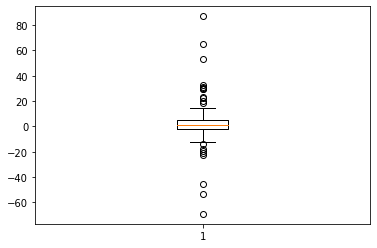

In [16]:
plt.boxplot(newprice_apart['growth rate(%)'])

In [17]:
newprice_apart = newprice_apart[newprice_apart['growth rate(%)']<=100]

{'whiskers': [<matplotlib.lines.Line2D at 0x1253365b0>,
 'caps': [<matplotlib.lines.Line2D at 0x125336b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1253362e0>],
 'medians': [<matplotlib.lines.Line2D at 0x125344130>],
 'fliers': [<matplotlib.lines.Line2D at 0x125344400>],
 'means': []}

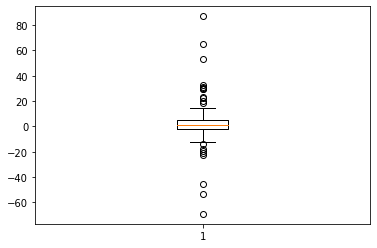

In [18]:
plt.boxplot(newprice_apart['growth rate(%)'])

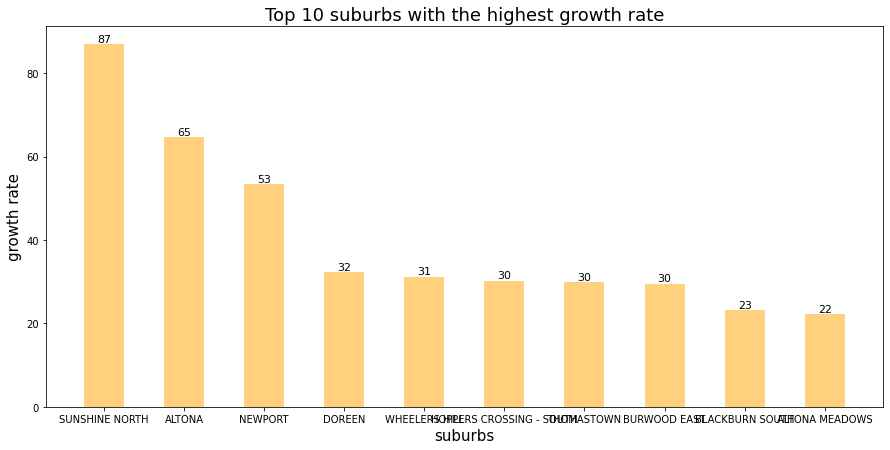

In [19]:
# plot the relationship between income growth rate and top10 suburb
df2 = newprice_apart[['suburb','growth rate(%)']]
y = df2['growth rate(%)'][:10]
x = df2['suburb'][:10]

fig = plt.figure(figsize =(15, 7))
plt.bar(x, y, alpha=0.5, width = 0.5, linewidth = 2, color = 'orange')
plt.title('Top 10 suburbs with the highest growth rate', fontsize= 18)
for a,b in zip(x,y):
 plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.xlabel('suburbs', fontsize = 15)
plt.ylabel('growth rate', fontsize = 15)
plt.show()
#plt.savefig("../plots/apartment growth rate.png")

In [20]:
for i in df2['suburb'][:10]:
    print('Top10suburb is %s' % i)


Top10suburb is SUNSHINE NORTH
Top10suburb is ALTONA
Top10suburb is NEWPORT
Top10suburb is DOREEN
Top10suburb is WHEELERS HILL
Top10suburb is HOPPERS CROSSING - SOUTH
Top10suburb is THOMASTOWN
Top10suburb is BURWOOD EAST
Top10suburb is BLACKBURN SOUTH
Top10suburb is ALTONA MEADOWS
